# Importing Important Libraries

In [49]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor 
import xgboost as xgb
import graphviz

# Loading Datasets

In [50]:
main_df = pd.read_csv('ML case Study.csv')
cities_df = pd.read_csv('cities.csv')
colleges_df = pd.read_csv('colleges.csv')

In [51]:
main_df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [52]:
cities_df.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [53]:
colleges_df.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


# Data preprocessing

In [54]:
Tier1 = colleges_df["Tier 1"].tolist()
Tier2 = colleges_df["Tier 2"].tolist()
Tier3 = colleges_df["Tier 3"].tolist()

In [55]:
for item in main_df.College:
    if item in Tier1:
        main_df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        main_df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        main_df["College"].replace(item, 3, inplace=True)


In [56]:
main_df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [57]:
metrio_cities = cities_df['Metrio City'].tolist()
non_metro_cities = cities_df['non-metro cities'].tolist()

In [58]:
for item in main_df.City:
    if item in metrio_cities:
        main_df["City"].replace(item, 1, inplace=True)
    elif item in non_metro_cities:
        main_df["City"].replace(item, 2, inplace=True)

In [59]:
main_df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,2,Manager,55523,3,66,19,71406.58
1,2,2,Executive,57081,1,84,18,68005.87
2,3,2,Executive,60347,2,52,28,76764.02
3,3,2,Executive,49010,2,81,33,82092.39
4,1,2,Executive,57879,4,74,32,73878.10


# Checking for null values

In [60]:
main_df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

# Checking for outliers

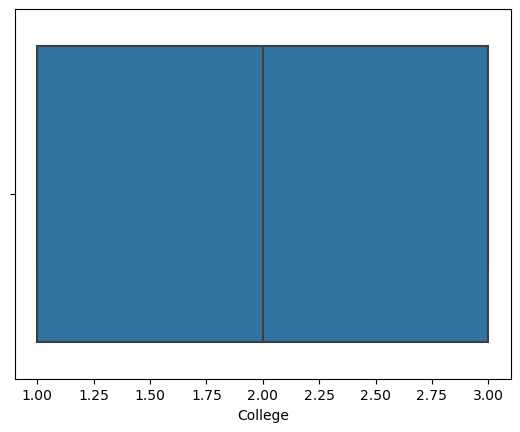

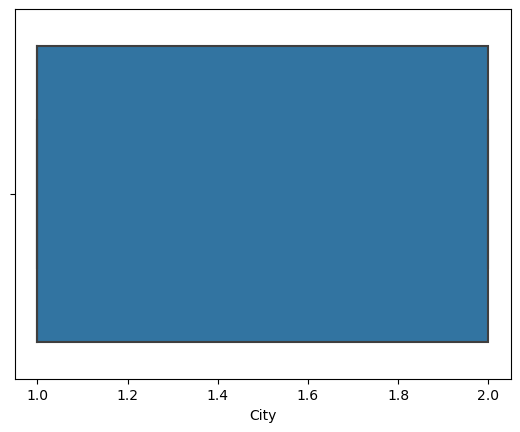

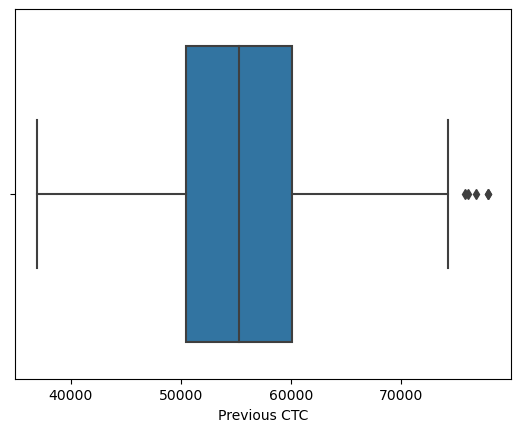

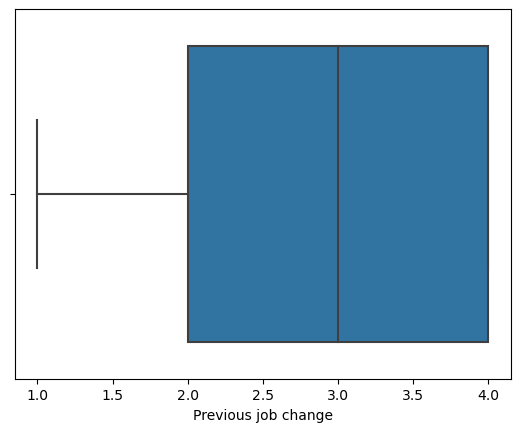

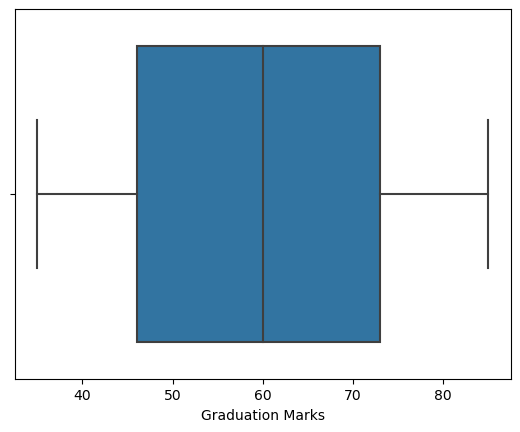

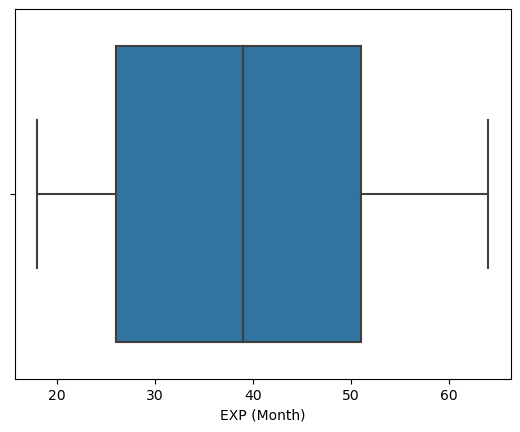

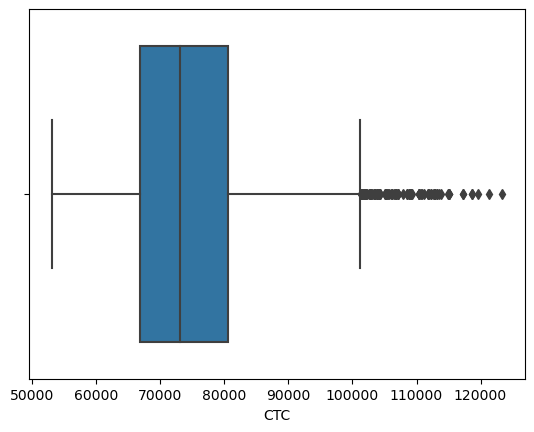

In [61]:
for col in main_df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=main_df[col])
    plt.show()


# Coverting categoring variables into numerical values

In [62]:
main_df=pd.get_dummies(main_df)

In [63]:
main_df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,2,55523,3,66,19,71406.58,0,1
1,2,2,57081,1,84,18,68005.87,1,0
2,3,2,60347,2,52,28,76764.02,1,0
3,3,2,49010,2,81,33,82092.39,1,0
4,1,2,57879,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,1,1,61285,3,44,60,77283.59,1,0
1585,1,2,63140,1,44,24,68416.86,1,0
1586,1,1,44907,1,60,19,70186.19,1,0
1587,1,2,52054,2,67,29,73394.09,1,0


# Implementing Linear Regression(OLS)

In [64]:
# Define the target variable (y) and features (X)
X = main_df.drop('CTC', axis=1)
y = main_df['CTC']

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          4.70e-257
Time:                        17:49:30   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.262e+04   1519.863     21.461      0.000    2.96e+04    3.56e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6565.1145    783.099      8.384      0.000    5029.093    8101.136
Role_Manager         2.605e+04    827.464     31.485      0.000    2.44e+04    2.77e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     1.03e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.66e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    105077.70
Name: CTC, Length: 318, dtype: float64

# LinearRegression

In [66]:

X_simple = main_df[['Previous CTC']]  # Using 'Previous CTC' as the predictor
y_simple = main_df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create linear regression model
model_linear = LinearRegression()

# Train the linear regression model
model_linear.fit(X_train, y_train)

# Predict 'CTC' on the test set using linear regression
y_pred_linear_test = model_linear.predict(X_test)
y_pred_linear_train = model_linear.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for linear regression model
r_squared_linear_test = r2_score(y_test, y_pred_linear_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
r_squared_linear_train = r2_score(y_train, y_pred_linear_train)
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)

print("Linear Regression Results:")
print(f"R-squared for training set: {r_squared_linear_train}")
print(f"Mean Squared Error for training set: {mse_linear_train}")
print(f"R-squared for test set: {r_squared_linear_test}")
print(f"Mean Squared Error for test set: {mse_linear_test}")

# Prompt user to input the previous CTC
previous_ctc = float(input("Enter the Previous CTC: "))

# Predict the CTC based on the input previous CTC using linear regression
predicted_ctc_linear = model_linear.predict([[previous_ctc]])

# Display the predicted CTC using linear regression
print("\nPredicted CTC (Linear Regression):", predicted_ctc_linear[0])

coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Linear Regression Results:
R-squared for training set: 0.07345233517619754
Mean Squared Error for training set: 139291820.3783863
R-squared for test set: 0.0441620968197316
Mean Squared Error for test set: 181843352.15368006
Enter the Previous CTC: 54340

Predicted CTC (Linear Regression): 74755.66694271319
Coefficients: [-5.17509158e+02 -4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02 -9.30104190e+03  9.30104190e+03]
Intercept: 49496.20877757158


C:\Users\HP HDD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## RidgeCV


In [67]:

# Create RidgeCV regression model
model_ridge_cv = RidgeCV()

# Train the RidgeCV regression model
model_ridge_cv.fit(X_train, y_train)

# Predict 'CTC' on the test set using RidgeCV regression
y_pred_ridge_cv_test = model_ridge_cv.predict(X_test)
y_pred_ridge_cv_train = model_ridge_cv.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for RidgeCV regression model
r_squared_ridge_cv_test = model_ridge_cv.score(X_test, y_test)
mse_ridge_cv_test = mean_squared_error(y_test, y_pred_ridge_cv_test)
r_squared_ridge_cv_train = model_ridge_cv.score(X_train, y_train)
mse_ridge_cv_train = mean_squared_error(y_train, y_pred_ridge_cv_train)

print("\nRidgeCV Regression Results:")
print(f"R-squared for training set: {r_squared_ridge_cv_train}")
print(f"Mean Squared Error for training set: {mse_ridge_cv_train}")
print(f"R-squared for test set: {r_squared_ridge_cv_test}")
print(f"Mean Squared Error for test set: {mse_ridge_cv_test}")


# Prompt user to input the previous CTC
previous_ctc = float(input("Enter the Previous CTC: "))


# Predict the CTC based on the input previous CTC using RidgeCV regression
predicted_ctc_ridge_cv = model_ridge_cv.predict([[previous_ctc]])

# Display the predicted CTC using RidgeCV regression
print("Predicted CTC (RidgeCV Regression):", predicted_ctc_ridge_cv[0])


RidgeCV Regression Results:
R-squared for training set: 0.07345233517619687
Mean Squared Error for training set: 139291820.37838638
R-squared for test set: 0.04416209821201311
Mean Squared Error for test set: 181843351.8888055
Enter the Previous CTC: 54340
Predicted CTC (RidgeCV Regression): 74755.66699297022


C:\Users\HP HDD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


## LassoCV


In [68]:

# Create LassoCV regression model
model_lasso_cv = LassoCV()

# Train the LassoCV regression model
model_lasso_cv.fit(X_train, y_train)

# Predict 'CTC' on the test set using LassoCV regression
y_pred_lasso_cv_test = model_lasso_cv.predict(X_test)
y_pred_lasso_cv_train = model_lasso_cv.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for LassoCV regression model
r_squared_lasso_cv_test = model_lasso_cv.score(X_test, y_test)
mse_lasso_cv_test = mean_squared_error(y_test, y_pred_lasso_cv_test)
r_squared_lasso_cv_train = model_lasso_cv.score(X_train, y_train)
mse_lasso_cv_train = mean_squared_error(y_train, y_pred_lasso_cv_train)

print("\nLassoCV Regression Results:")
print(f"R-squared for training set: {r_squared_lasso_cv_train}")
print(f"Mean Squared Error for training set: {mse_lasso_cv_train}")
print(f"R-squared for test set: {r_squared_lasso_cv_test}")
print(f"Mean Squared Error for test set: {mse_lasso_cv_test}")

# Prompt user to input the previous CTC
previous_ctc = float(input("Enter the Previous CTC: "))


# Predict the CTC based on the input previous CTC using LassoCV regression
predicted_ctc_lasso_cv = model_lasso_cv.predict([[previous_ctc]])

# Display the predicted CTC using LassoCV regression
print("Predicted CTC (LassoCV Regression):", predicted_ctc_lasso_cv[0])



LassoCV Regression Results:
R-squared for training set: 0.07344750250302357
Mean Squared Error for training set: 139292546.89453787
R-squared for test set: 0.04427709604680585
Mean Squared Error for test set: 181821474.12930304
Enter the Previous CTC: 54340
Predicted CTC (LassoCV Regression): 74759.95921429759


C:\Users\HP HDD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


# Multiple Linear Regression

In [69]:

X = main_df.drop(columns=['CTC'])
y = main_df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Multiple Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = linear_regressor.predict(X_test)
y_pred_train = linear_regressor.predict(X_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Multiple Linear Regression Results:")
print("Train Data:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)
print("\nTest Data:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

# College	City	Previous CTC	Previous job change	Graduation Marks	EXP (Month)	CTC	Role_Executive	Role_Manager


# Prompt user to input the predictor variables
college = int(input("Enter College Tier1, Tier2, Tier3: "))
city = int(input("Enter city Metro city:1, NonMetro City:2"))
prev_ctc = int(input("Enter previous CTC: "))
prev_job_change = int(input("Enter Previous Job change: "))
graduation_marks = int(input("Enter Graduation marks: "))
exp_month = int(input("Enter Experience in months: "))
role_executive = int(input("Enter 1 if the Role is Executive, else enter 0: "))
role_manager = int(input("Enter 1 if the Role is Manager, else enter 0: "))

# Create a DataFrame for the input data
input_data = pd.DataFrame({
    'College': [college],
    'City': [city],
    'Previous CTC': [prev_ctc],
    'Previous job change': [prev_job_change],
    'Graduation Marks': [graduation_marks],
    'EXP (Month)': [exp_month],
    'Role_Executive': [role_executive],
    'Role_Manager': [role_manager]
})

# Make prediction for the input data using the trained model
predicted_salary = linear_regressor.predict(input_data)

print("Predicted Salary:", predicted_salary[0])

coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Multiple Linear Regression Results:
Train Data:
Mean Squared Error: 73096299.02751341
R-squared: 0.5137747142134839

Test Data:
Mean Squared Error: 77362774.94956546
R-squared: 0.5933517958385088
Enter College Tier1, Tier2, Tier3: 1
Enter city Metro city:1, NonMetro City:22
Enter previous CTC: 54340
Enter Previous Job change: 4
Enter Graduation marks: 73
Enter Experience in months: 31
Enter 1 if the Role is Executive, else enter 0: 1
Enter 1 if the Role is Manager, else enter 0: 0
Predicted Salary: 69388.6210595794
Coefficients: [-5.17509158e+02 -4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02 -9.30104190e+03  9.30104190e+03]
Intercept: 49496.20877757158


# DecisionTreeRegressor

In [70]:

X = main_df.drop(columns=['CTC'])
y = main_df['CTC']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_regressor.fit(X_train, y_train)

# Exporting the decision tree to a DOT format
dot_data = export_graphviz(dt_regressor, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
tree_graph = graphviz.Source(dot_data)

tree_graph

from sklearn.metrics import r2_score

# Predicting the values for both training and test datasets
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Calculating the R² scores
r2_score_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R² score for training dataset: {r2_score_train}")
print(f"MSE for training dataset:{mse_train}")
print(f"R² score for test dataset: {r2_score_test}")
print(f"MSE for training dataset:{mse_test}")

college = int(input("Enter College Tier1, Tier2, Tier3: "))
city = int(input("Enter city Metro city:1, NonMetro City:2"))
Prev_ctc = int(input("Enter previous CTC: "))
prev_jobChange = int(input("Enter Previous Job change: "))
Graduation_Marks = int(input("Enter Graduation marks: "))
EXP_Month = int(input("Enter Experience in months: "))
Role_Executive = int(input("Enter 1 if the Role is Executive, else enter 0: "))
Role_Manager = int(input("Enter 1 if the Role is Manager, else enter 0: "))

input_data = pd.DataFrame({
    'College': [college],
    'City': [city],
       # Binary dummy variable for Role Manager
    'Previous CTC': [Prev_ctc],
    'Previous job change': [prev_jobChange],
    'Graduation Marks': [Graduation_Marks],
    'EXP (Month)': [EXP_Month],
    'Role_Executive': [Role_Executive],  # Binary dummy variable for Role Executive
    'Role_Manager': [Role_Manager]
})

# Make prediction for the input data
predicted_salary =dt_regressor.predict(input_data)

print("Predicted Salary:", predicted_salary[0])

R² score for training dataset: 0.6062958846879378
MSE for training dataset:59187201.041306265
R² score for test dataset: 0.5949148978491665
MSE for training dataset:77065402.65617716
Enter College Tier1, Tier2, Tier3: 1
Enter city Metro city:1, NonMetro City:22
Enter previous CTC: 54340
Enter Previous Job change: 4
Enter Graduation marks: 73
Enter Experience in months: 31
Enter 1 if the Role is Executive, else enter 0: 1
Enter 1 if the Role is Manager, else enter 0: 0
Predicted Salary: 67821.0086530612


# RandomForestRegressor

In [71]:
X = main_df.drop(columns=['CTC'])
y = main_df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = rf_regressor.predict(X_test)
y_pred_train = rf_regressor.predict(X_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


college = int(input("Enter College Tier1, Tier2, Tier3: "))
city = int(input("Enter city Metro city:1, NonMetro City:2"))
prev_ctc = int(input("Enter previous CTC: "))
prev_job_change = int(input("Enter Previous Job change: "))
graduation_marks = int(input("Enter Graduation marks: "))
exp_month = int(input("Enter Experience in months: "))
role_executive = int(input("Enter 1 if the Role is Executive, else enter 0: "))
role_manager = int(input("Enter 1 if the Role is Manager, else enter 0: "))

input_data = pd.DataFrame({
    'College': [college],
    'City': [city],
    'Previous CTC': [prev_ctc],
    'Previous job change': [prev_job_change],
    'Graduation Marks': [graduation_marks],
    'EXP (Month)': [exp_month],
    'Role_Executive': [role_executive],
    'Role_Manager': [role_manager]
})

# Make prediction for the input data
predicted_salary = rf_regressor.predict(input_data)

print("Predicted Salary:", predicted_salary[0])


Mean Squared Error: 7790808.464086579
R-squared: 0.9481767459863779
Mean Squared Error: 68742790.95712602
R-squared: 0.6386617141126592
Enter College Tier1, Tier2, Tier3: 1
Enter city Metro city:1, NonMetro City:22
Enter previous CTC: 54340
Enter Previous Job change: 4
Enter Graduation marks: 73
Enter Experience in months: 31
Enter 1 if the Role is Executive, else enter 0: 1
Enter 1 if the Role is Manager, else enter 0: 0
Predicted Salary: 66210.94219999993


# AdaBoostRegressor

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor model
ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
ada_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = ada_regressor.predict(X_test)
y_pred_train = ada_regressor.predict(X_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train Data:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)
print("\nTest Data:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

college = int(input("Enter College Tier1, Tier2, Tier3: "))
city = int(input("Enter city Metro city:1, NonMetro City:2"))
Prev_ctc = int(input("Enter previous CTC: "))
prev_jobChange = int(input("Enter Previous Job change: "))
Graduation_Marks = int(input("Enter Graduation marks: "))
EXP_Month = int(input("Enter Experience in months: "))
Role_Executive = int(input("Enter 1 if the Role is Executive, else enter 0: "))
Role_Manager = int(input("Enter 1 if the Role is Manager, else enter 0: "))

input_data = pd.DataFrame({
    'College': [college],
    'City': [city],
    'Previous CTC': [Prev_ctc],
    'Previous job change': [prev_jobChange],
    'Graduation Marks': [Graduation_Marks],
    'EXP (Month)': [EXP_Month],
    'Role_Executive': [Role_Executive],
    'Role_Manager': [Role_Manager]
})

# Make prediction for the input data
predicted_salary = ada_regressor.predict(input_data)

print("Predicted Salary:", predicted_salary[0])


Train Data:
Mean Squared Error: 58592477.167006545
R-squared: 0.6102518959989427

Test Data:
Mean Squared Error: 80872985.03605738
R-squared: 0.5749007949684901
Enter College Tier1, Tier2, Tier3: 1
Enter city Metro city:1, NonMetro City:22
Enter previous CTC: 54340
Enter Previous Job change: 4
Enter Graduation marks: 73
Enter Experience in months: 31
Enter 1 if the Role is Executive, else enter 0: 1
Enter 1 if the Role is Manager, else enter 0: 0
Predicted Salary: 69260.54210720884


# XGBoost Regressor

In [73]:

X = main_df.drop(columns=['CTC'])
y = main_df['CTC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = xgb_regressor.predict(X_test)
y_pred_train = xgb_regressor.predict(X_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Train Data:")
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)
print("\nTest Data:")
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

college = int(input("Enter College Tier1, Tier2, Tier3: "))
city = int(input("Enter city Metro city:1, NonMetro City:2"))
Prev_ctc = int(input("Enter previous CTC: "))
prev_jobChange = int(input("Enter Previous Job change: "))
Graduation_Marks = int(input("Enter Graduation marks: "))
EXP_Month = int(input("Enter Experience in months: "))
Role_Executive = int(input("Enter 1 if the Role is Executive, else enter 0: "))
Role_Manager = int(input("Enter 1 if the Role is Manager, else enter 0: "))

input_data = pd.DataFrame({
    'College': [college],
    'City': [city],
    'Previous CTC': [Prev_ctc],
    'Previous job change': [prev_jobChange],
    'Graduation Marks': [Graduation_Marks],
    'EXP (Month)': [EXP_Month],
    'Role_Executive': [Role_Executive],  # Binary dummy variable for Role Executive
    'Role_Manager': [Role_Manager]      # Binary dummy variable for Role Manager
})

# Make prediction for the input data
predicted_salary = xgb_regressor.predict(input_data)

print("Predicted Salary:", predicted_salary[0])


Train Data:
Mean Squared Error: 1452669.7064021206
R-squared: 0.9903370655895598

Test Data:
Mean Squared Error: 69261355.11387257
R-squared: 0.635935943440382
Enter College Tier1, Tier2, Tier3: 1
Enter city Metro city:1, NonMetro City:22
Enter previous CTC: 54340
Enter Previous Job change: 4
Enter Graduation marks: 73
Enter Experience in months: 31
Enter 1 if the Role is Executive, else enter 0: 1
Enter 1 if the Role is Manager, else enter 0: 0
Predicted Salary: 63458.156


# All Models Performance 

Linear Regression Results:<br>
R-squared for training set: 0.07345233517619754 <br>
Mean Squared Error for training set: 139291820.3783863 <br>
R-squared for test set: 0.0441620968197316<br>
Mean Squared Error for test set: 181843352.15368006<br>
<br>
RidgeCV Results:-<br>
R-squared for training set: 0.07345233517619687<br>
Mean Squared Error for training set: 139291820.37838638<br>
R-squared for test set: 0.04416209821201311<br>
Mean Squared Error for test set: 181843351.8888055<br>
<br>
LassoCV Regression Results:<br>
R-squared for training set: 0.07344750250302357<br>
Mean Squared Error for training set: 139292546.89453787<br>
R-squared for test set: 0.04427709604680585<br>
Mean Squared Error for test set: 181821474.12930304<br>
<br>
Multiple linear regression results:<br>
Train Data:<br>
Mean Squared Error: 73096299.02751341<br>
R-squared: 0.5137747142134839<br>
Test Data:<br>
Mean Squared Error: 77362774.94956546<br>
R-squared: 0.5933517958385088<br>
<br>
Decisiontree regreession results<br>
R² score for training dataset: 0.6062958846879378<br>
MSE for training dataset:59187201.041306265<br>
R² score for test dataset: 0.5949148978491665<br>
MSE for yesy dataset:77065402.65617716<br>
<br>
RandomForestRegressor results<br>
Mean Squared Error for training: 7790808.464086579<br>
R-squared for training: 0.9481767459863779<br>
Mean Squared Error for testing: 68742790.95712602<br>
R-squared for testing: 0.6386617141126592<br>
<br>
Adaboost regression results<br>
Train Data:
Mean Squared Error: 58592477.167006545<br>
R-squared: 0.6102518959989427<br>
Test Data:
Mean Squared Error: 80872985.03605738<br>
R-squared: 0.5749007949684901<br>
<br>
XGBoost regression results<br>
Train Data:
Mean Squared Error: 1452669.7064021206<br>
R-squared: 0.9903370655895598<br>
Test Data:
Mean Squared Error: 69261355.11387257<br>
R-squared: 0.635935943440382<br>

## Views about the problem statement
In this problem statement we have to predict the salary (CTC) based on various features such as college tier, city type, previous CTC, previous job change, graduation marks, experience in months, and roles.<br> 
The main objective is to build machine learning models that accurately predict salary based on these features.




## What will be your approach to solve this task
To solve this task,

1.Imported the required libraries

2.Loaded the dataset and transformed the datset where it is required . 

3.we first preprocess the data by check missing values in data.

4.checking for the outliers 

5.converting categorical variables into  numerical variables/dummy variable. 

6.Then, we split the data into training and testing sets and train sets 

7.Performed the various regression models including Linear Regression, RidgeCV, LassoCV, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, and XGBoost. 

8.Finally, we evaluate the performance of these models using metrics like Mean Squared Error (MSE) and R-squared.

## What were available ML model to perform this task
The available ML models used in this task include <br>

1.Linear Regression  (Used previous CTC as X and CTC as Y)<br>

2.RidgeCV  (Used previous CTC as X and CTC as Y)<br>

3.LassoCV  (Used previous CTC as X and CTC as Y)<br>

5.Multiple linear regression  (Used All columns ecxept CTC as X and CTC as Y)<br>

4.DecisionTreeRegressor   (Used All columns ecxept CTC as X and CTC as Y)<br>

5.RandomForestRegressor   (Used All columns ecxept CTC as X and CTC as Y)<br>

6.AdaBoostRegressor   (Used All columns ecxept CTC as X and CTC as Y)<br>

7.XGBoost.  (Used All columns ecxept CTC as X and CTC as Y)<br>


These models are commonly used for regression tasks and have different strengths and weaknesses.



## What maodel performance is the best and what could be the possible reason for that

the XGBoost regression model demonstrates the best performance, with a significantly high R-squared score of 0.99 on the training data and a relatively high score of 0.64 on the testing data. Additionally, it has the lowest Mean Squared Error (MSE) on the training data among all the models.
<br>
<br>
When comparing the XGBoost Regression model with the Random Forest Regressor.Random forest regressor has R-squared 0.94 on training data and R-squared score of 0.63 on testing data.Both models performs good but XGBoost gives high performance
<br>
<br>
Reasons for giving the best performance includes:-<br>
XGBoost is based on gradient boosting<br>
XGBoost incorporates regularization techniques to prevent overfitting<br>
XGBoost can capture complex, non-linear relationships between features and the target variable<br>

## what steps can you take to improvethis selected models performance even further
To improve the XGBoost, RandomForestRegressor's performance further, several steps can be taken:

Hyperparameter Tuning: Fine-tune the hyperparameters of the RandomForestRegressor using techniques like grid search or random search to find the optimal combination of hyperparameters.<BR>
Feature Engineering: Explore additional features or engineer new features that may capture important patterns in the data more effectively.<BR>
Ensemble Methods: Experiment with ensemble methods such as Gradient Boosting or Stacking, which combine multiple models to improve predictive performance.<BR>
Cross-Validation: Use cross-validation techniques to ensure that the model's performance is robust and generalizable to unseen data.<BR>
Data Augmentation: If more data is available, consider augmenting the dataset through techniques like bootstrapping or synthetic data generation to improve model generalization.<BR>

# Thank You!